In [151]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns
%matplotlib inline

# Data Cleaning for Personal Question
- Import the CSVs
- Rename Them
- Choose the Relevant Ones
- Clean Them

## Our Tentative Personal Question:
- Are lead actors a predictor of profitability or is there a different crew member worth investing more money in?

In [3]:
csv_files = glob('zippedData/*.csv.gz')
csv_dfs = [pd.read_csv(f) for f in csv_files]

In [4]:
df1=csv_dfs[0]
df2=csv_dfs[1]
df3=csv_dfs[2]
df4=csv_dfs[3]
df5=csv_dfs[4]
df6=csv_dfs[5]
df7=csv_dfs[6]
df8=csv_dfs[7]
df9=csv_dfs[8]

In [5]:
bom_gross_df = df1
imdb_name_basics_df = df2
imdb_title_aka_df = df3
imdb_title_basics_df = df4
imdb_crew_df = df5
imdb_principals_df = df6
imdb_ratings_df = df7
tmdb_movie_list_df= df8
tmdb_budgets_df = df9

In [65]:
bom_gross_df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [66]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_profitability
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [8]:
def convert_amt_to_int64(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('int64')
    return df

In [9]:
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    tmdb_budgets_df = convert_amt_to_int64(tmdb_budgets_df, col)

In [10]:
tmdb_budgets_df.head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [74]:
tmdb_budgets_df['worldwide_profitability'] = tmdb_budgets_df['worldwide_gross'] - tmdb_budgets_df['production_budget']

In [75]:
tmdb_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_profitability,ROI,worldwide_profitability
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,1748134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,221.140142,663420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,118.648403,355945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.206974,579620923


In [76]:
tmdb_budgets_df['worldwide_ROI']=(tmdb_budgets_df['worldwide_profitability'] /(tmdb_budgets_df['production_budget']) * (100))

In [77]:
tmdb_budgets_df.head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_profitability,ROI,worldwide_profitability,worldwide_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2351345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,635063875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-200237650,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,1072413963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,999721747,315.369636
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,571.016739,1747311220,571.016739
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,1748134200,582.711400
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,221.140142,663420425,221.140142
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,118.648403,355945209,118.648403
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,193.206974,579620923,193.206974


In [13]:
imdb_name_basics_df.head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


In [78]:
tmdb_budgets_df['domestic_profitability'] = tmdb_budgets_df['domestic_gross'] - tmdb_budgets_df['production_budget']

In [79]:
tmdb_budgets_df['domestic_ROI']=(tmdb_budgets_df['domestic_profitability'] /(tmdb_budgets_df['production_budget']) * (100))

In [80]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_profitability,ROI,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,2351345279,553.257713,335507625,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,635063875,154.667286,-169536125,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-200237650,-57.210757,-307237650,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,1072413963,324.384139,128405868,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,999721747,315.369636,303181382,95.640815


In [84]:
tmdb_budgets_df.drop(columns=['ROI', 'overall_profitability'], inplace = True)

In [85]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,128405868,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,303181382,95.640815


In [14]:
imdb_crew_df.head(10)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


In [15]:
imdb_principals_df.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [16]:
imdb_title_basics_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Plan of Attack:

### Match imdb_name_basics_df to imdb_title_basics_df to tmdb_budgets_df
- This will have our crew matched with their films matched with the films' overall profitability
- Try to clean a bit before we join
- We may wrangle imdb_crew in here before we're finished if we want to focus on directors & writers v. actors

In [17]:
imdb_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [18]:
# scrap original_title, start_year, runtime_minutes, and genres

In [19]:
imdb_name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [20]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
imdb_name_basics_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [23]:
imdb_name_basics_df.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [25]:
imdb_name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [26]:
imdb_name_basics_df.drop(columns=['birth_year','death_year'], inplace=True)

In [34]:
imdb_name_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [29]:
imdb_name_basics_df.shape

(606648, 4)

In [39]:
imdb_name_basics_df. dropna(subset=['primary_profession','known_for_titles'], inplace=True)

In [40]:
imdb_name_basics_df.isna().sum()

nconst                0
primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [43]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [44]:
imdb_title_basics_df.drop(columns=['runtime_minutes', 'genres'], inplace=True)

In [46]:
imdb_title_basics_df.head()

,tconst,primary_title,original_title,start_year
0,tt0063540,Sunghursh,Sunghursh,2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017


In [47]:
imdb_title_basics_df.isna().sum()

tconst             0
primary_title      0
original_title    21
start_year         0
dtype: int64

In [48]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
tconst            146144 non-null object
primary_title     146144 non-null object
original_title    146123 non-null object
start_year        146144 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [49]:
imdb_title_basics_df.dropna(subset=['original_title'], inplace=True)

In [50]:
imdb_title_basics_df.isna().sum()

tconst            0
primary_title     0
original_title    0
start_year        0
dtype: int64

In [51]:
imdb_title_basics_df.duplicated().sum()

0

In [56]:
imdb_title_basics_df.head(10)

,tconst,primary_title,original_title,start_year
0,tt0063540,Sunghursh,Sunghursh,2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017
5,tt0111414,A Thin Life,A Thin Life,2018
6,tt0112502,Bigfoot,Bigfoot,2017
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017
8,tt0139613,O Silêncio,O Silêncio,2012
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012


In [57]:
tmdb_budgets_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_profitability
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923


In [67]:
tmdb_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                       5782 non-null int64
release_date             5782 non-null object
movie                    5782 non-null object
production_budget        5782 non-null int64
domestic_gross           5782 non-null int64
worldwide_gross          5782 non-null int64
overall_profitability    5782 non-null int64
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [61]:
imdb_name_basics_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


## Perhaps a new strategy for a new question:
- Measure worldwide ROI for non-English films to see which cultures may be worth investing in.
- Plan of attack: Join tmdb_budgets to imdb_title_aka_df and plot accordingly

In [86]:
tmdb_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,128405868,38.840250
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636,303181382,95.640815


In [87]:
imdb_title_aka_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [88]:
budget_to_aka_df = join_df=tmdb_budgets_df.join(imdb_title_aka_df.set_index('title'), on=['movie'], how='inner')
print(len(budget_to_aka_df))

10608


In [89]:
budget_to_aka_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI,title_id,ordering,region,language,types,attributes,is_original_title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971,tt1775309,2,XWW,en,imdbDisplay,NaN,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,14,US,NaN,NaN,NaN,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,19,NaN,NaN,original,NaN,1.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,23,CA,en,imdbDisplay,NaN,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186,tt6565702,16,US,NaN,NaN,NaN,0.0


In [92]:
budget_to_aka_df.language.isna().sum()

9067

In [101]:
budget_to_aka_df.language.nunique()

24

In [109]:
budget_to_aka_df.dropna(subset=['language'], inplace = True)

In [110]:
budget_to_aka_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI,title_id,ordering,region,language,types,attributes,is_original_title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971,tt1775309,2,XWW,en,imdbDisplay,NaN,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,23,CA,en,imdbDisplay,NaN,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186,tt6565702,1,BD,en,imdbDisplay,NaN,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,13,XWW,en,imdbDisplay,NaN,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,14,US,en,NaN,NaN,0.0


In [118]:
budget_to_aka_df.language.nunique()

24

In [138]:
budget_to_aka_df.language.value_counts()

en     929
fr     243
he     156
tr     133
sv      34
de       7
hi       5
it       4
hr       4
te       3
bg       3
fa       3
id       2
ca       2
bn       2
es       2
cmn      2
qbn      1
ur       1
nl       1
ar       1
kn       1
ta       1
pt       1
Name: language, dtype: int64

In [128]:
budget_to_aka_df.drop(columns=['types', 'attributes'], inplace=True)

In [129]:
budget_to_aka_df.isna().sum()

id                         0
release_date               0
movie                      0
production_budget          0
domestic_gross             0
worldwide_gross            0
worldwide_profitability    0
worldwide_ROI              0
domestic_profitability     0
domestic_ROI               0
title_id                   0
ordering                   0
region                     0
language                   0
is_original_title          0
dtype: int64

In [130]:
budget_to_aka_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI,title_id,ordering,region,language,is_original_title
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971,tt1775309,2,XWW,en,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,23,CA,en,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186,tt6565702,1,BD,en,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,13,XWW,en,0.0
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,14,US,en,0.0


In [136]:
budget_to_aka_df.drop(columns='is_original_title', inplace=True)

In [137]:
budget_to_aka_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profitability,worldwide_ROI,domestic_profitability,domestic_ROI,title_id,ordering,region,language
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,553.257713,335507625,78.942971,tt1775309,2,XWW,en
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,-169536125,-41.289850,tt1298650,23,CA,en
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757,-307237650,-87.782186,tt6565702,1,BD,en
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,13,XWW,en
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,378815482,126.271827,tt4154756,14,US,en


(-1, 24.42434968271065)

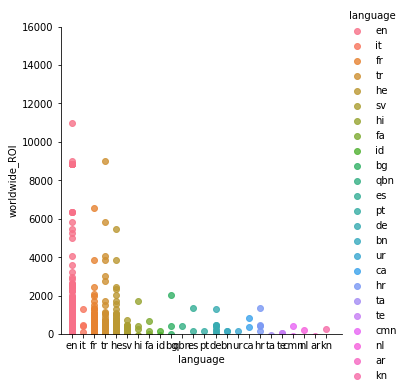

In [157]:
sns.lmplot(x='language', y='worldwide_ROI', data=budget_to_aka_df,
           fit_reg=False, # No regression line
           hue='language') 
plt.ylim(-1, 16000)
plt.xlim(-1, None)

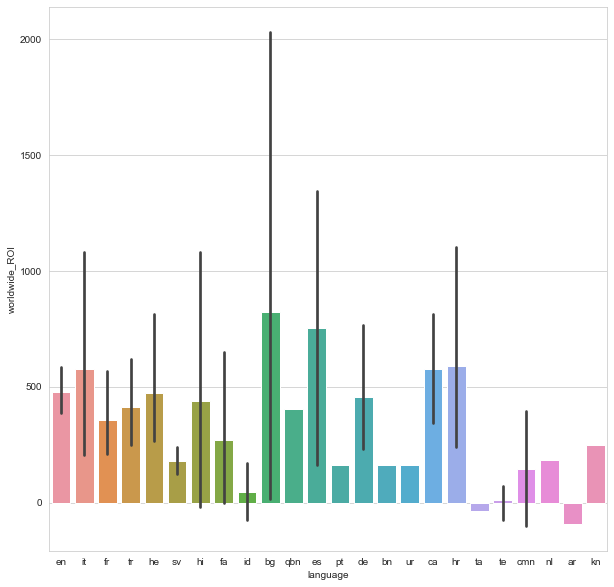

In [170]:
plt.figure(figsize = (10,10))

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.barplot(x='language', y='worldwide_ROI', data=budget_to_aka_df)

In [235]:
budget_to_aka_df.to_csv('zippedData/budget_to_aka.csv')